In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [30]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

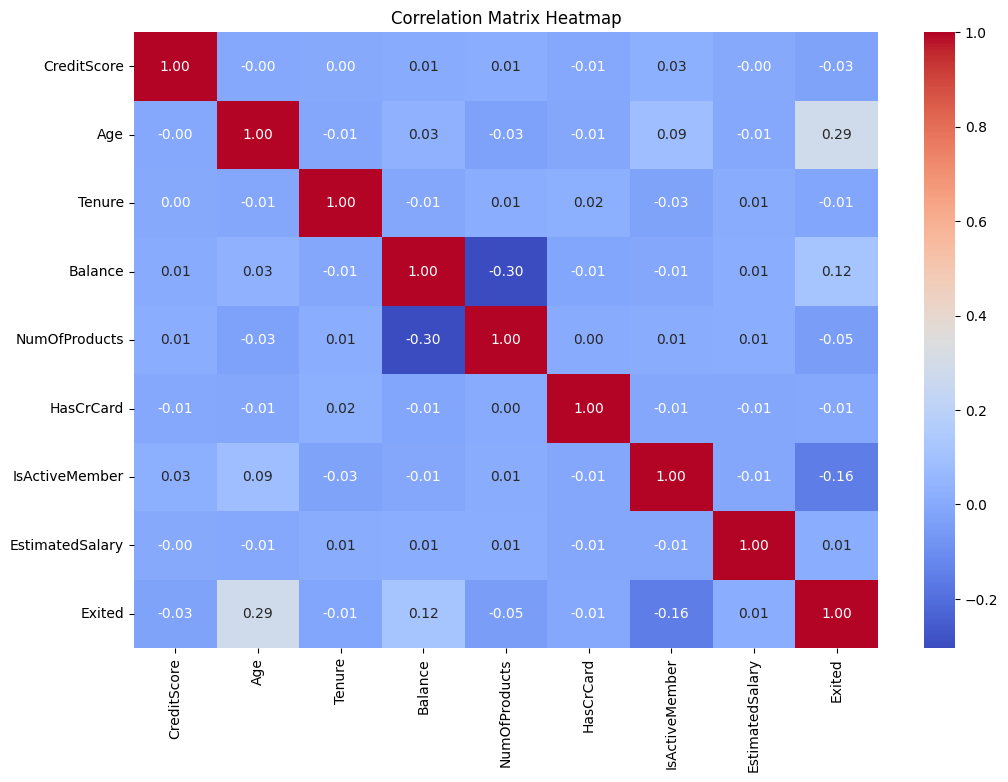

In [31]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = dataset[
    [
        "CreditScore",
        "Age",
        "Tenure",
        "Balance",
        "NumOfProducts",
        "HasCrCard",
        "IsActiveMember",
        "EstimatedSalary",
        "Exited",
    ]
].corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

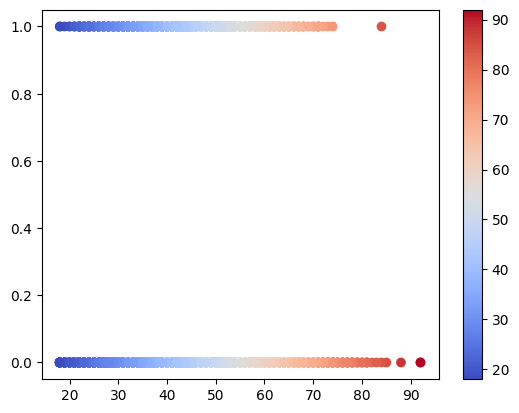

In [32]:
plt.scatter(dataset["Age"], dataset["Exited"], c=dataset["Age"], cmap="coolwarm")
plt.colorbar()
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])